In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import BaggingClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import confusion_matrix, accuracy_score, roc_auc_score, classification_report

%matplotlib inline

### Load the dataset

In [2]:
data = pd.read_csv('parkinsons.data')

# EDA

In [3]:
data.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
157,phon_R01_S37_5,117.963,134.209,100.757,0.01813,0.00015,0.01117,0.00718,0.03351,0.04912,...,0.07830,0.10748,19.075,1,0.630547,0.646786,-3.444478,0.303214,2.964568,0.261305
119,phon_R01_S27_5,217.116,233.481,93.978,0.00404,0.00002,0.00127,0.00128,0.00381,0.01299,...,0.02038,0.00681,24.581,1,0.462516,0.582710,-5.517173,0.389295,2.925862,0.220657
77,phon_R01_S19_6,110.568,125.394,106.821,0.00462,0.00004,0.00226,0.00280,0.00677,0.02199,...,0.03852,0.00420,25.820,1,0.429484,0.816340,-5.391029,0.250572,1.777901,0.232744
124,phon_R01_S31_3,156.239,195.107,79.820,0.00694,0.00004,0.00403,0.00395,0.01209,0.02343,...,0.03867,0.02020,19.196,1,0.618663,0.728421,-5.944191,0.143359,1.929715,0.181988
37,phon_R01_S08_2,176.170,185.604,163.564,0.00369,0.00002,0.00205,0.00218,0.00616,0.01851,...,0.02814,0.00340,24.951,1,0.341435,0.783626,-6.006414,0.196371,2.536527,0.173218


In [91]:
print ('Number of attributes in file: '+ str(len(data.columns)))

Number of attributes in file: 24


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [101]:
print ('Data Type of attributes ====================')
data.dtypes

Data Type of attributes ====================


name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [5]:
print ('shape of data set ', data.shape)

shape of data set  (195, 24)


In [103]:
np.sum(data.isna())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc.

In [105]:
descibe_df = pd.DataFrame(data.describe())
descibe_df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [106]:
print ('Central values of all attributes ')
descibe_df.iloc[[1,5],:]

Central values of all attributes 


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
mean,154.228641,197.104918,116.324631,0.00622,0.000044,0.003306,0.003446,0.00992,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
50%,148.790000,175.829000,104.315000,0.00494,0.000030,0.002500,0.002690,0.00749,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052


In [107]:
print ('tail of data')
data.tail()

tail of data


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


### Creating box plots for each column to check the spread

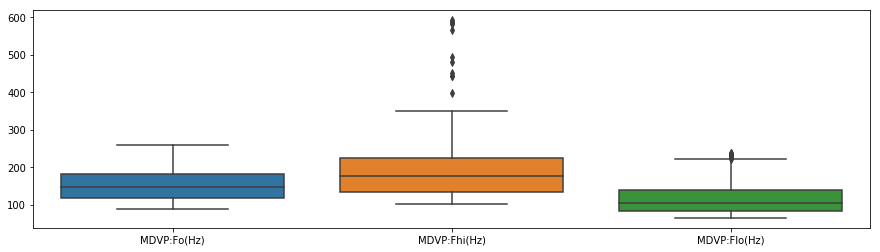

In [13]:
plt.figure(figsize=(15,4))
sns.boxplot(data=data.iloc[:,:4])

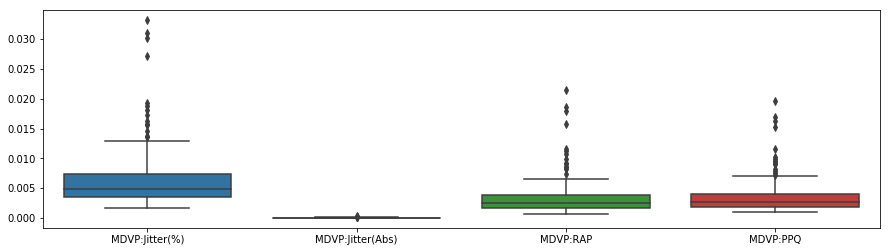

In [14]:
plt.figure(figsize=(15,4))
sns.boxplot(data=data.iloc[:,4:8])

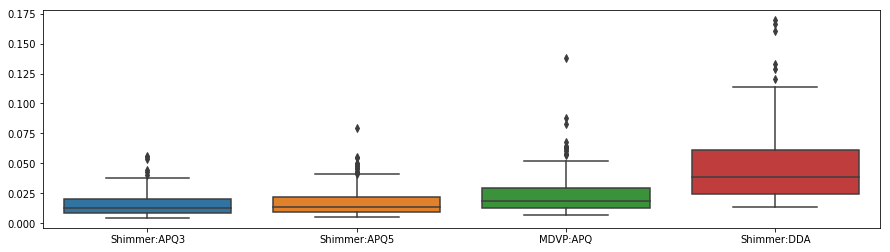

In [15]:
plt.figure(figsize=(15,4))
sns.boxplot(data=data.iloc[:,11:15])

In [16]:
plt_data = data.drop(columns=['status','name'], axis=1)

### checking density plots for each feature below

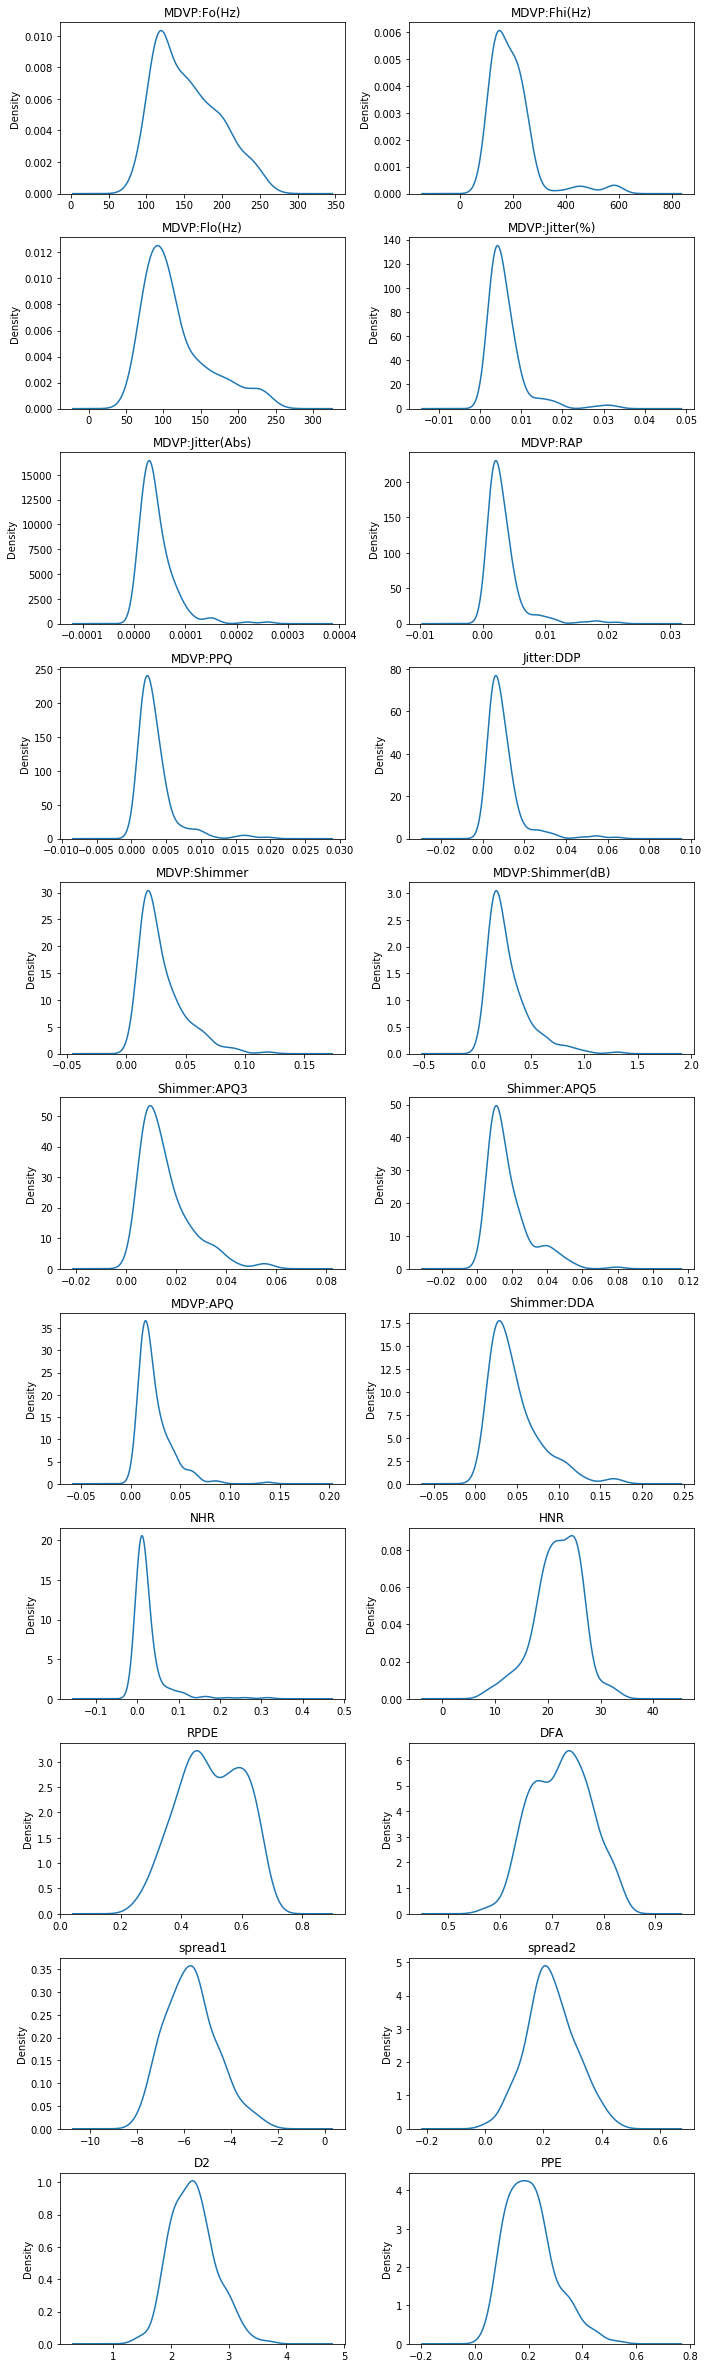

In [17]:
k = len(plt_data.columns)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))

for i, (name, col) in enumerate(plt_data.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    ax2 = col.plot.kde(ax=ax, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

### checking skewness of each feature below

In [18]:
for col in plt_data.columns:
    skew_value = plt_data[col].skew()
    if (skew_value > 0):
        print ('Skewness of column '+col+' is '+ str(skew_value)+' i.e. skewed right')
    elif (skew_value < 0):
        print ('Skewness of column '+col+' is '+ str(skew_value)+' i.e. skewed left')
    elif (skew_value == 0):
        print ('Skewness of column '+col+' is '+ str(skew_value)+' i.e. normally distributed')

Skewness of column MDVP:Fo(Hz) is 0.5917374636540784 i.e. skewed right
Skewness of column MDVP:Fhi(Hz) is 2.542145997588398 i.e. skewed right
Skewness of column MDVP:Flo(Hz) is 1.217350448627808 i.e. skewed right
Skewness of column MDVP:Jitter(%) is 3.0849462014441817 i.e. skewed right
Skewness of column MDVP:Jitter(Abs) is 2.6490714165257274 i.e. skewed right
Skewness of column MDVP:RAP is 3.360708450480554 i.e. skewed right
Skewness of column MDVP:PPQ is 3.073892457888517 i.e. skewed right
Skewness of column Jitter:DDP is 3.3620584478857203 i.e. skewed right
Skewness of column MDVP:Shimmer is 1.6664804101559663 i.e. skewed right
Skewness of column MDVP:Shimmer(dB) is 1.999388639086127 i.e. skewed right
Skewness of column Shimmer:APQ3 is 1.5805763798815677 i.e. skewed right
Skewness of column Shimmer:APQ5 is 1.798697066537622 i.e. skewed right
Skewness of column MDVP:APQ is 2.618046502215422 i.e. skewed right
Skewness of column Shimmer:DDA is 1.5806179936782263 i.e. skewed right
Skewn

### comparing different features using scatterplot

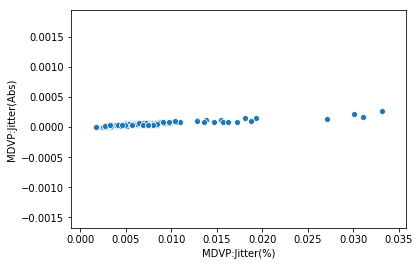

In [50]:
sns.scatterplot(data=plt_data, x='MDVP:Jitter(%)', y='MDVP:Jitter(Abs)')

In [55]:
print('MDVP:Jitter(%) and MDVP:Jitter(Abs) linearly dependent')

MDVP:Jitter(%) and MDVP:Jitter(Abs) linearly dependent


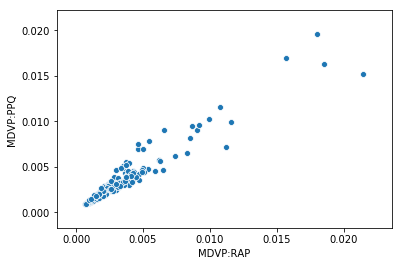

In [51]:
sns.scatterplot(data=plt_data, x='MDVP:RAP', y='MDVP:PPQ')

In [56]:
print('MDVP:RAP and MDVP:PPQ linearly dependent')

MDVP:RAP and MDVP:PPQ linearly dependent


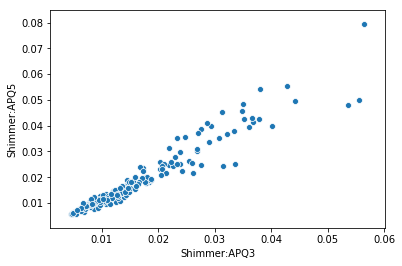

In [52]:
sns.scatterplot(data=plt_data, x='Shimmer:APQ3', y='Shimmer:APQ5')

In [57]:
print('Shimmer:APQ3 and Shimmer:APQ5 linearly dependent')

Shimmer:APQ3 and Shimmer:APQ5 linearly dependent


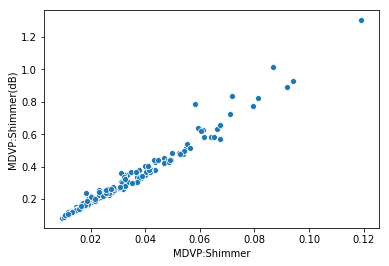

In [53]:
sns.scatterplot(data=plt_data, x='MDVP:Shimmer', y='MDVP:Shimmer(dB)')

In [58]:
print('MDVP:Shimmer and MDVP:Shimmer(dB) linearly dependent')

MDVP:Shimmer and MDVP:Shimmer(dB) linearly dependent


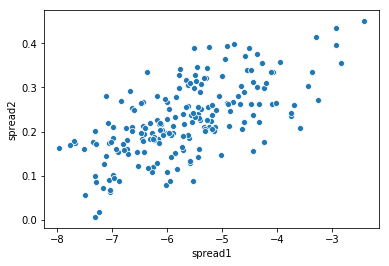

In [60]:
sns.scatterplot(data=plt_data, x='spread1', y='spread2')

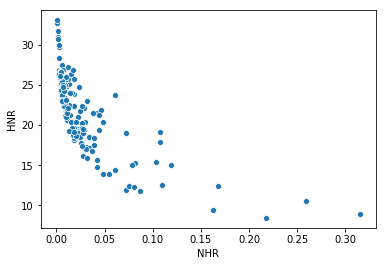

In [61]:
sns.scatterplot(data=plt_data, x='NHR', y='HNR')

In [62]:
print('HNR and NHR has a inverse dependancy, i.e. when NHR increases HNR decreases')

HNR and NHR has a inverse dependancy, i.e. when NHR increases HNR decreases


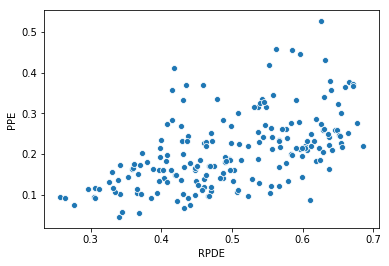

In [63]:
sns.scatterplot(data=plt_data, x='RPDE', y='PPE')

### Checking the correlation between all the features

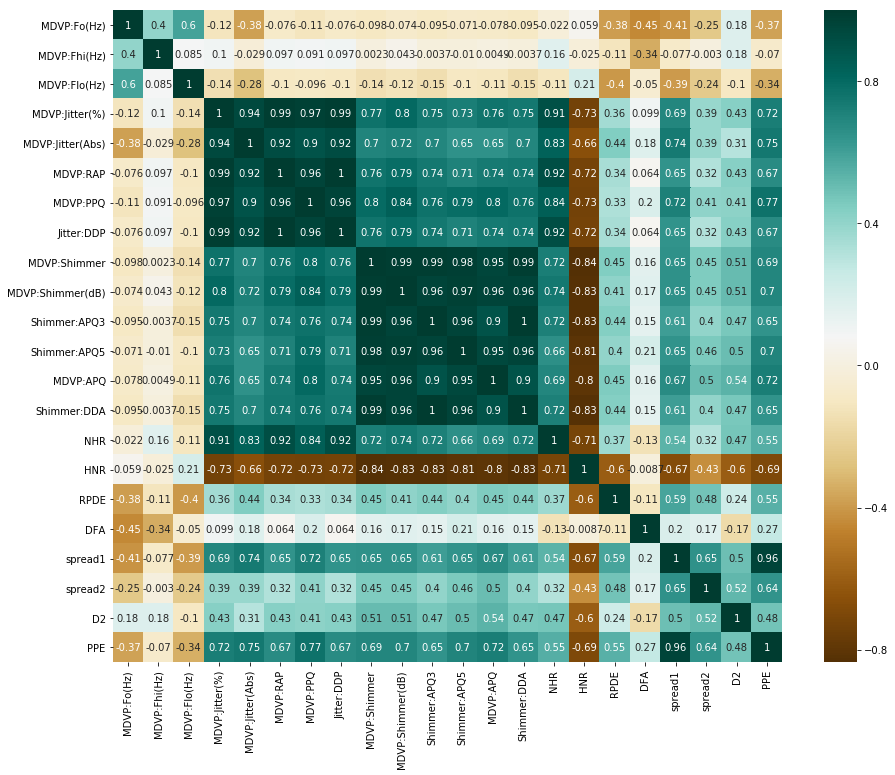

In [19]:
plt.figure(figsize=(15, 12))
df_corr = data.drop('status', axis=1).corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True, cmap='BrBG');

# Observations:

#### 1. MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP are highly correlated
#### 2. MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA are highly correlated
#### 3. PPE and spread1 are highly correlated

In [20]:
# Dropping name column as it does not give any inference for analysis
final_df = data.drop(columns=['name'], axis=1)

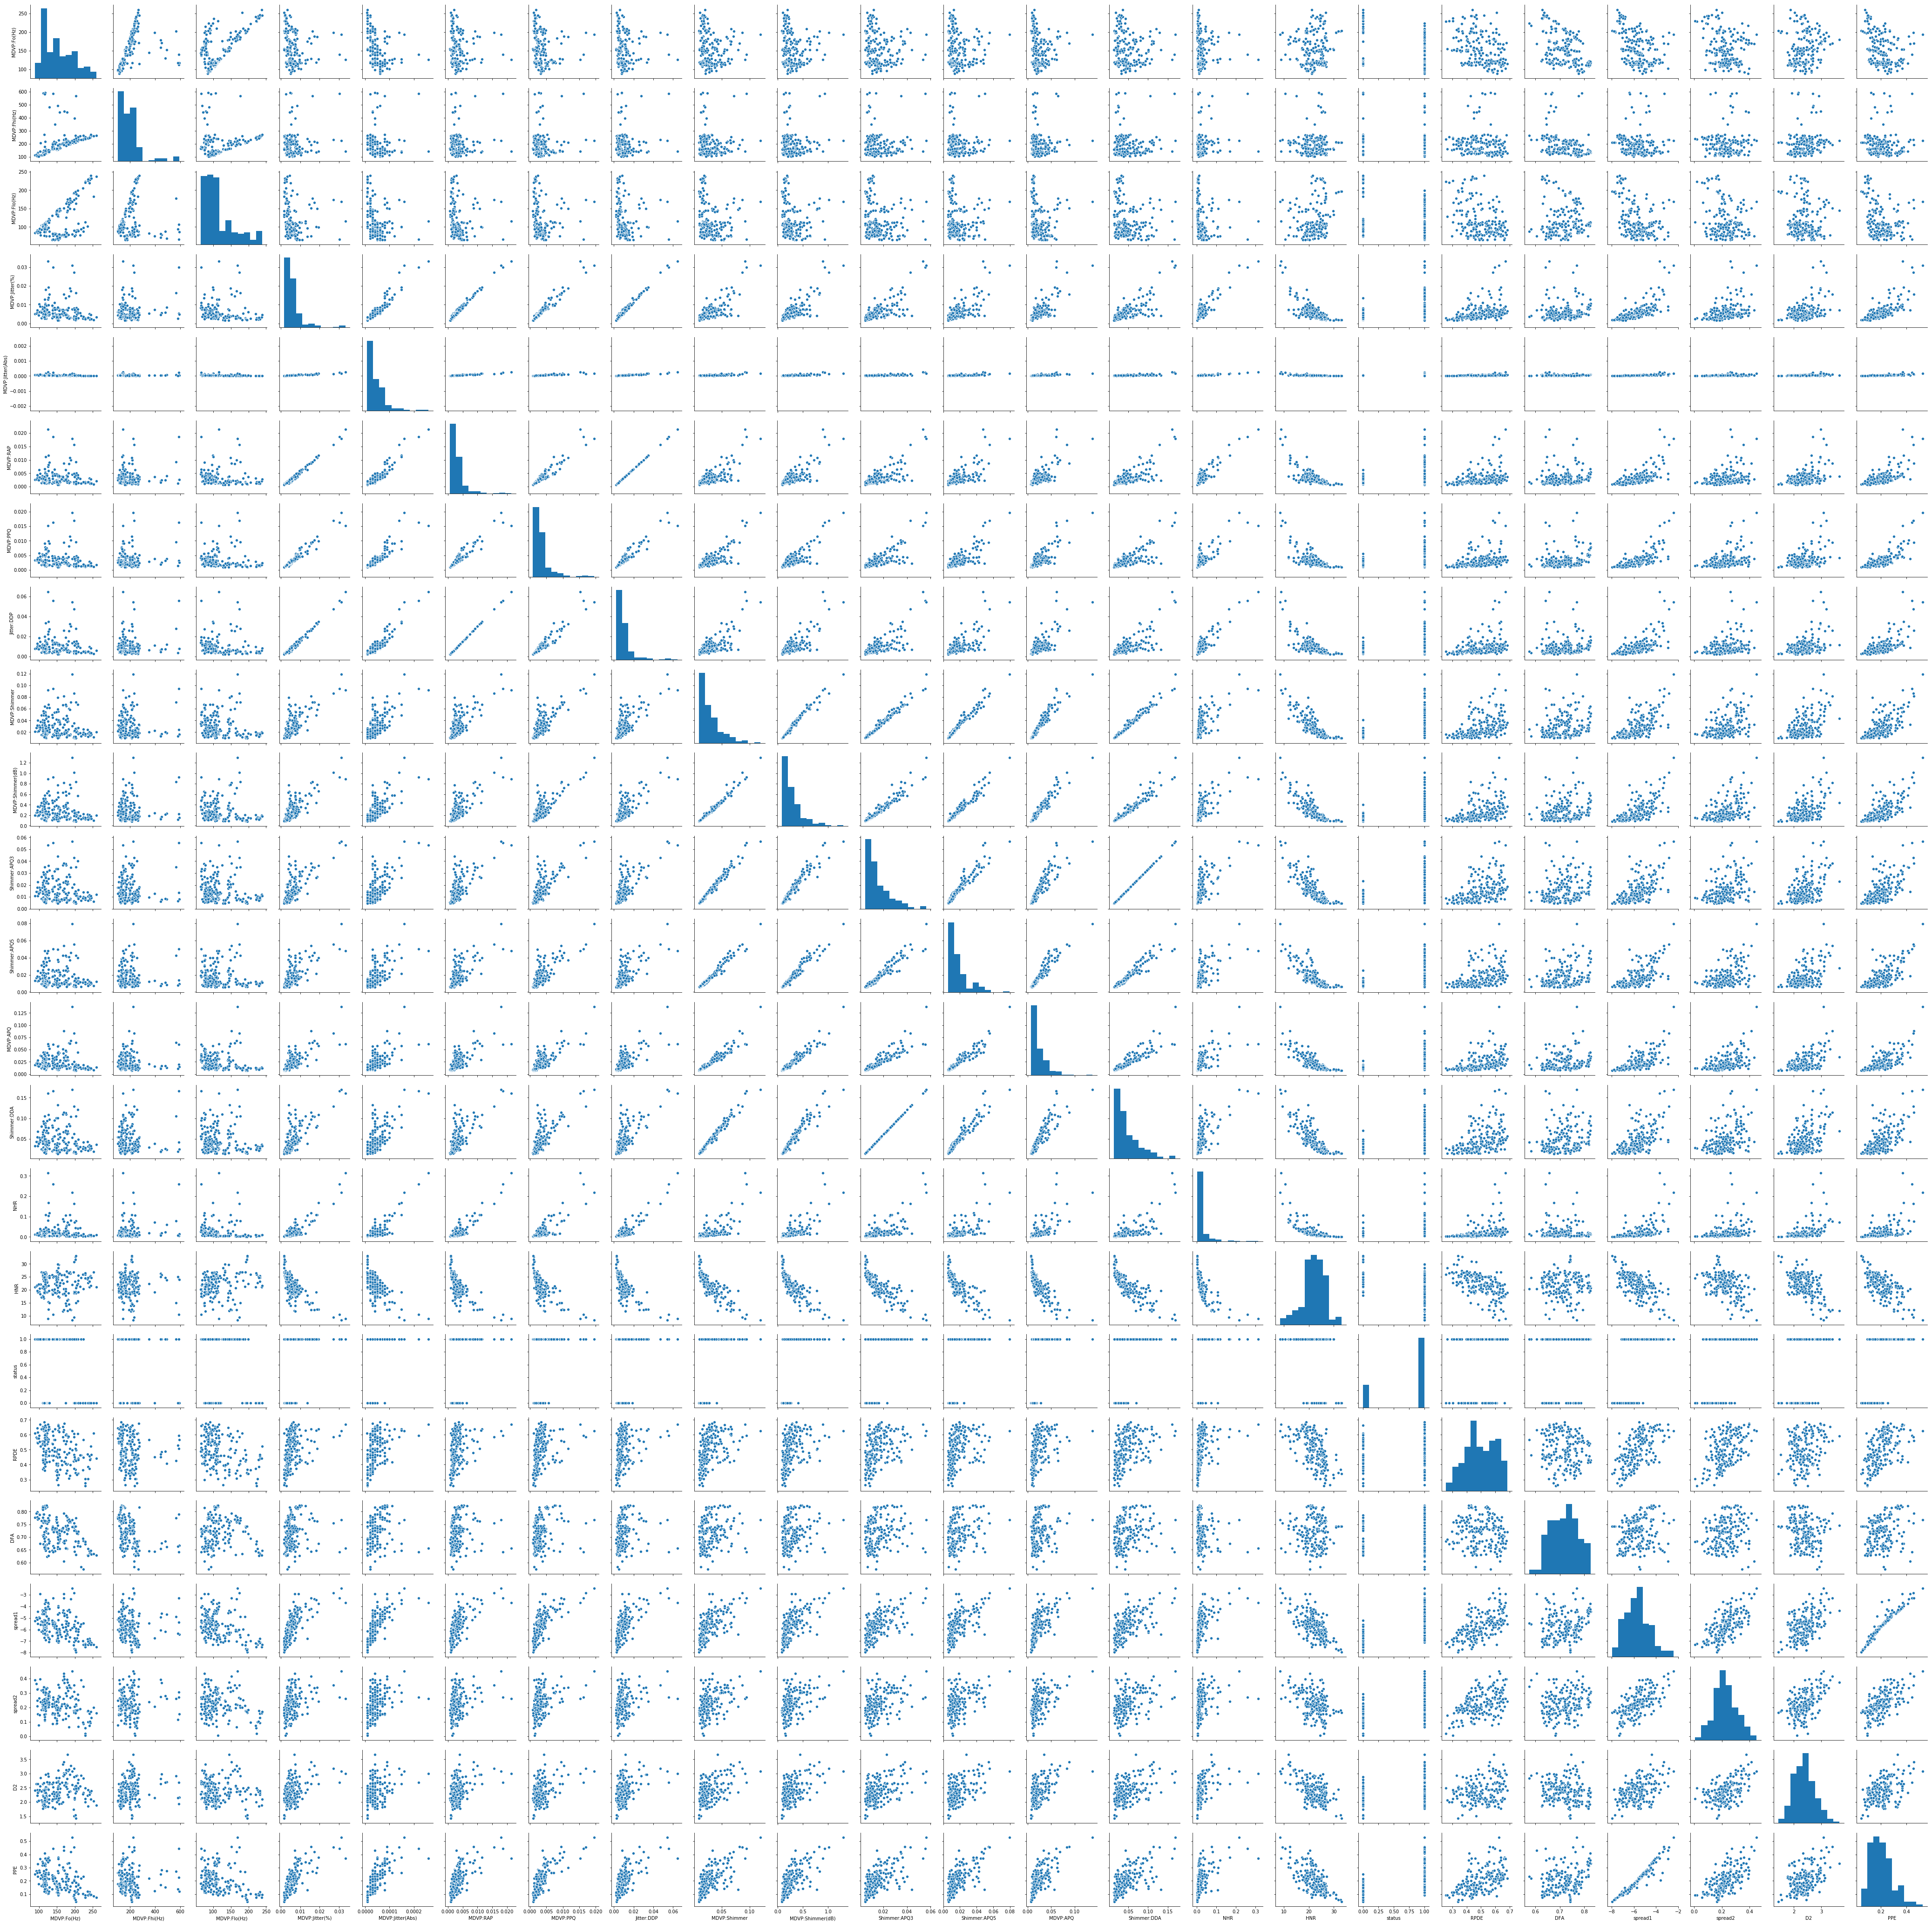

In [21]:
sns.pairplot(final_df)

### Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [22]:
X = final_df.drop(columns=['status'], axis=1)
y = final_df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=157, stratify=y)

### Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [23]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [24]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [25]:
print("Train accuracy is", dt_model.score(X_train , y_train))
print("Test accuracy is", dt_model.score(X_test , y_test))

Train accuracy is 1.0
Test accuracy is 0.847457627118644


In [26]:
predictions = dt_model.predict(X_test)
print ("Predicted values from decision tree classifier ", predictions)

Predicted values from decision tree classifier  [1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1]


In [27]:
prediction_series = pd.Series(data=predictions, name='predicted_status')

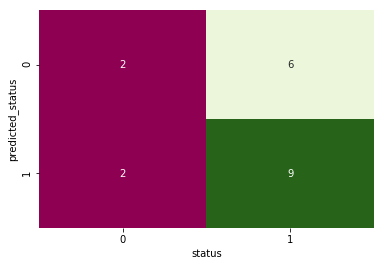

In [28]:
sns.heatmap(pd.crosstab(prediction_series, y_test),
            cmap="PiYG", annot=True, cbar=False)

## Using regularization parameters of max_depth, min_sample_leaf to recreate the model. Checking regularization impact on the model accuracy

In [29]:
dt = DecisionTreeClassifier(random_state=120)

In [30]:
parameters = {'criterion':('entropy', 'gini'),
              'max_depth':[2, 3, 5, 6, 7, 8, 9, 10, 13, 15, 21, 25],              
              'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20]
             }

clf = GridSearchCV(dt, parameters, cv=15)

In [31]:
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=15, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=120,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ('entropy', 'gini'), 'max_depth': [2, 3, 5, 6, 7, 8, 9, 10, 13, 15, 21, 25], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
print ('Best parameters detected for decision tree classifiers using Grid Search CV are ')
print (clf.best_params_)

Best parameters detected for decision tree classifiers using Grid Search CV are 
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3}


In [33]:
print ('Best score detected for random forest classifiers using Grid Search CV is ', clf.best_score_)

Best score detected for random forest classifiers using Grid Search CV is  0.875


In [34]:
decision_tree = DecisionTreeClassifier(criterion= 'gini', max_depth=3, min_samples_leaf=3, random_state=120)
# decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, min_samples_leaf=3, random_state=120)

In [35]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=120,
            splitter='best')

In [36]:
y_test_predict = decision_tree.predict(X_test)
y_test_predict

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [37]:
print("Train accuracy is", decision_tree.score(X_train , y_train))
print("Test accuracy is", decision_tree.score(X_test , y_test))

Train accuracy is 0.9411764705882353
Test accuracy is 0.9152542372881356


### Observations

#### 1. When I used Decision tree with default hyper parameter I got a low accuracy score for test data , but very high accuracy score for training data. That means the model overfitted.

#### 2. after regularizing max_depth and min_sample_leaf hyper parameter , I got a very good accuracy for test data, which implies that regularized model performed well and predicted target column better.

## Decision tree using Random Forest. Checking optimal number of trees that gives the best result

In [ ]:
# checking the accuracy value of random forest classifier with different values of number of decision tree

In [282]:
best_test_score = 0
train_score = 0
tree_count = 0
for i in range(1,100):
    rf_clf = RandomForestClassifier(n_estimators = i, criterion='gini', max_depth=24, random_state=120)
    rf_clf.fit(X_train, y_train)
    test_score = rf_clf.score(X_test , y_test)
    if (best_test_score < test_score):
        best_test_score = test_score
        train_score = rf_clf.score(X_train , y_train)
        tree_count= i
print("Train  accuracy using Random forest of: "+str(tree_count)+' trees is: '+str(train_score))
print("Test  accuracy using Random forest of: "+str(tree_count)+' trees is: '+str(best_test_score))

Train  accuracy using Random forest of: 3 trees is: 0.9485294117647058
Test  accuracy using Random forest of: 3 trees is: 0.9152542372881356


#### from above loop, running random forest classifier, I conclude train accuracy (0.9485294117647058) and test accuracy (0.9152542372881356) is best using 3 number of trees, so as per my analysis we can say the optimal number of trees we can use is 3

In [270]:
#Running Grid search CV for verification

In [271]:
 rfc = RandomForestClassifier(random_state=120)

In [272]:
params = {'criterion':('entropy', 'gini'),
              'n_estimators':[10, 15, 20, 25, 30, 35, 50, 75, 100],
              'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15],              
              'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 10, 15],
             }

gs_clf = GridSearchCV(rfc, params, cv=15)

In [273]:
gs_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=15, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=120, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ('entropy', 'gini'), 'n_estimators': [10, 15, 20, 25, 30, 35, 50, 75, 100], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [274]:
print ('Best parameters detected for random forest classifiers using Grid Search CV are ')
print (gs_clf.best_params_)

Best parameters detected for random forest classifiers using Grid Search CV are 
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 15}


In [275]:
print ('Best score detected for random forest classifiers using Grid Search CV is ', gs_clf.best_score_)

Best score detected for random forest classifiers using Grid Search CV is  0.8970588235294118


In [283]:
number_of_trees = 70

In [284]:
rf_clf = RandomForestClassifier(n_estimators = number_of_trees, criterion='gini', max_depth=6, min_samples_leaf=2, min_samples_split=7, random_state=120)

In [285]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
            oob_score=False, random_state=120, verbose=0, warm_start=False)

In [286]:
y_test_predict_rf = rf_clf.predict(X_test)
print ('Predicted Values are : ')
print (y_test_predict_rf)

Predicted Values are : 
[1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1]


In [287]:
print("Train accuracy using Random forest is: ", rf_clf.score(X_train , y_train))
print("Test  accuracy using Random forest is: ", rf_clf.score(X_test , y_test))

Train accuracy using Random forest is:  0.9926470588235294
Test  accuracy using Random forest is:  0.9152542372881356
